In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/kaggle/input/iot-agriculture-2024/IoTProcessed_Data.csv')

# Display the structure of the dataset
print("Data Structure:")
print(data.info())

# Handle missing values for numeric columns
numeric_columns = data.select_dtypes(include=[np.number])
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())

# Check and handle missing values in 'date' column
if data['date'].isnull().any():
    # Assuming date is in a format that can be sorted, we can forward fill or backfill
    data['date'].fillna(method='ffill', inplace=True)

# Summarize key statistics for each sensor and actuator
print("\nKey Statistics:")
print(data.describe().transpose())

# Distinguish column types for tailored analysis
print("\nNumeric Columns:")
print(numeric_columns.columns)

categorical_columns = data.select_dtypes(exclude=[np.number])
print("\nCategorical Columns:")
print(categorical_columns.columns)


Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37922 entries, 0 to 37921
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     37920 non-null  object 
 1   tempreature              37922 non-null  int64  
 2   humidity                 37922 non-null  int64  
 3   water_level              37922 non-null  int64  
 4   N                        37922 non-null  int64  
 5   P                        37922 non-null  int64  
 6   K                        37922 non-null  int64  
 7   Fan_actuator_OFF         37922 non-null  float64
 8   Fan_actuator_ON          37922 non-null  float64
 9   Watering_plant_pump_OFF  37922 non-null  float64
 10  Watering_plant_pump_ON   37922 non-null  float64
 11  Water_pump_actuator_OFF  37922 non-null  float64
 12  Water_pump_actuator_ON   37922 non-null  float64
dtypes: float64(6), int64(6), object(1)
memory usage: 3.8+ MB
Non

/tmp/ipykernel_18/1692093553.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['date'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_18/1692093553.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['date'].fillna(method='ffill', inplace=True)


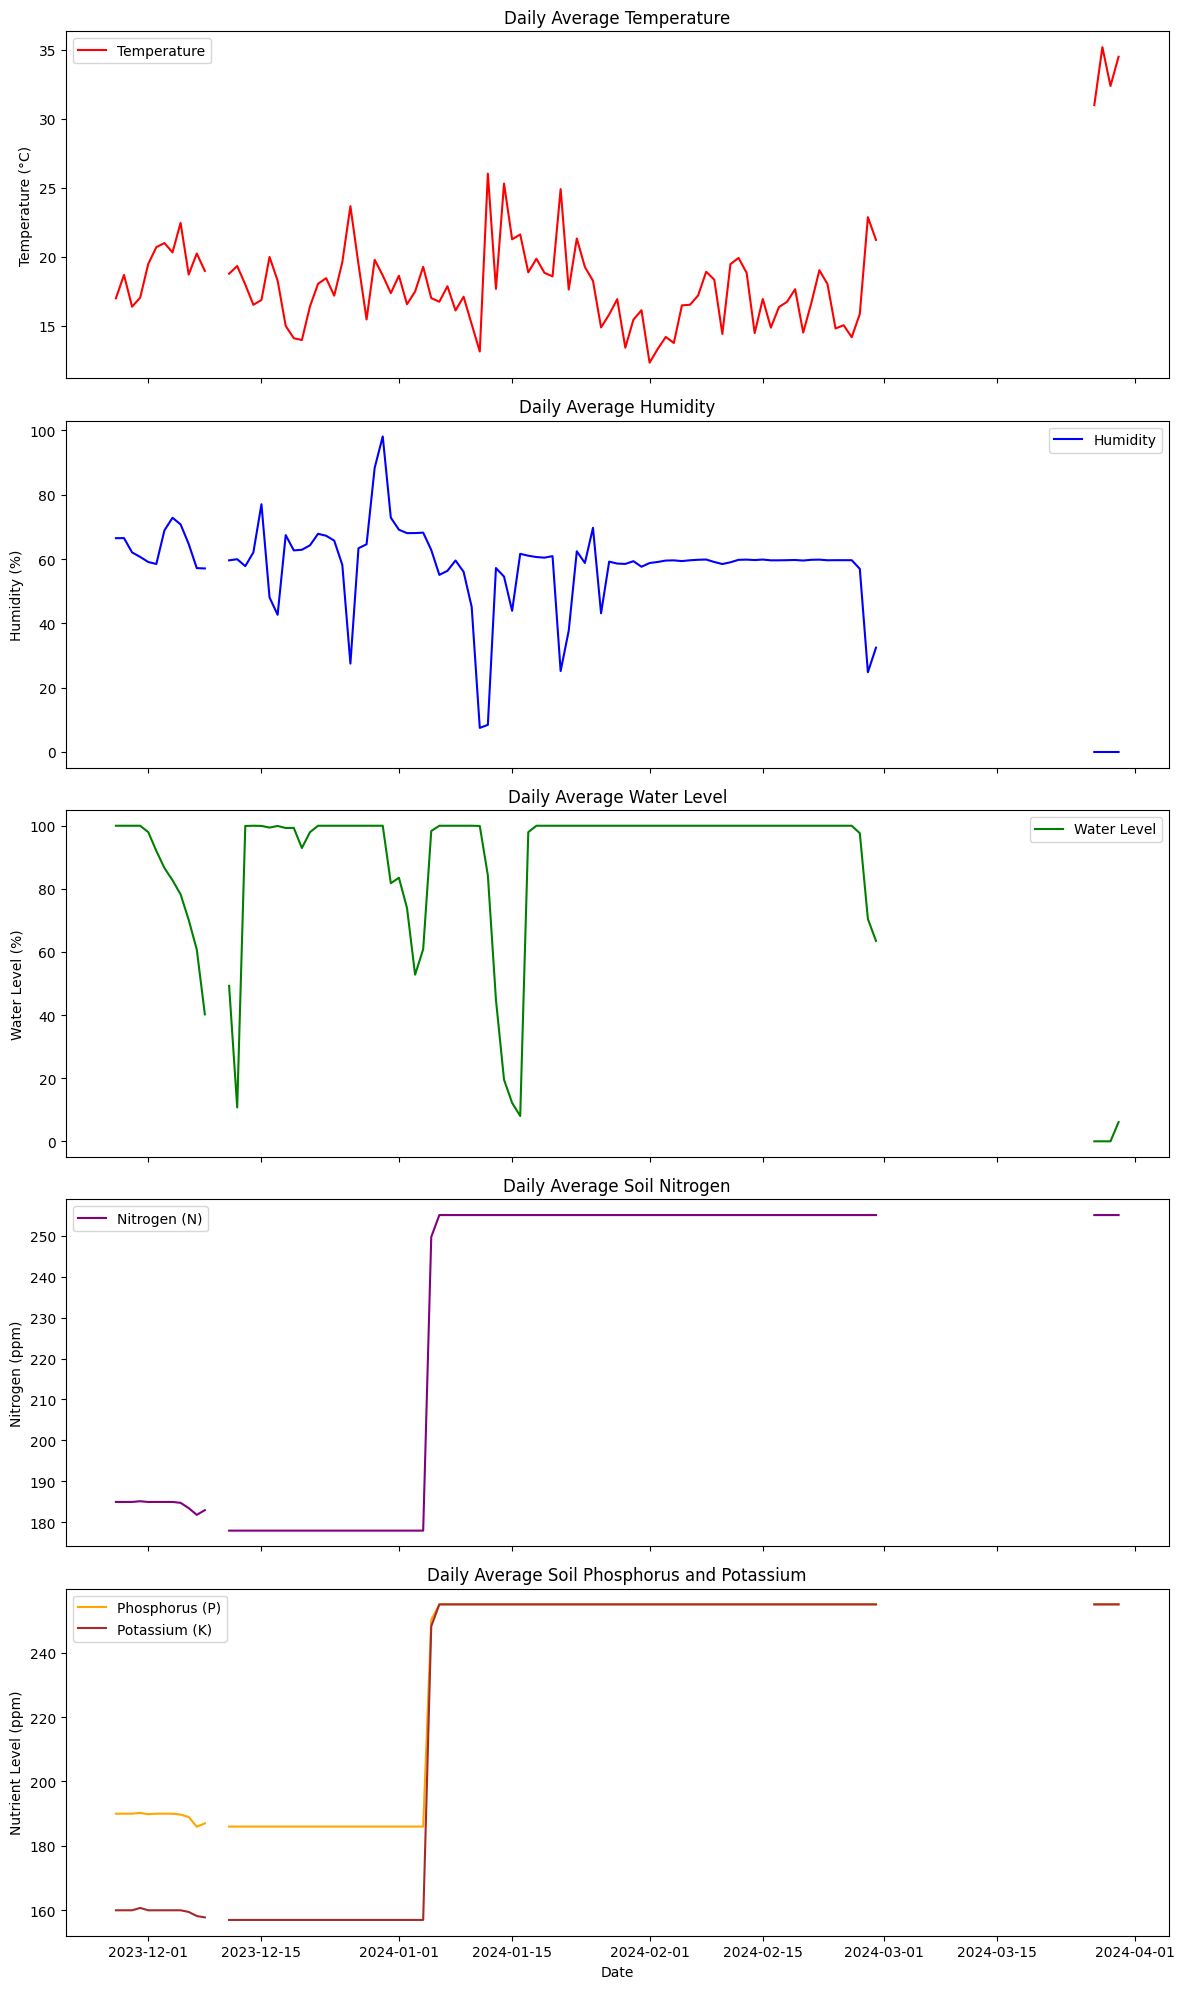

In [2]:
import matplotlib.pyplot as plt

# Convert 'date' column to datetime type for easier manipulation
data['date'] = pd.to_datetime(data['date'])

# Set 'date' as the index of the dataframe
data.set_index('date', inplace=True)

# Resample data to daily averages for a clearer trend analysis
daily_data = data.resample('D').mean()

# Plotting the trends for temperature, humidity, water level, and soil nutrients
fig, axs = plt.subplots(5, 1, figsize=(12, 20), sharex=True)

# Temperature
axs[0].plot(daily_data.index, daily_data['tempreature'], label='Temperature', color='red')
axs[0].set_title('Daily Average Temperature')
axs[0].set_ylabel('Temperature (°C)')
axs[0].legend()

# Humidity
axs[1].plot(daily_data.index, daily_data['humidity'], label='Humidity', color='blue')
axs[1].set_title('Daily Average Humidity')
axs[1].set_ylabel('Humidity (%)')
axs[1].legend()

# Water Level
axs[2].plot(daily_data.index, daily_data['water_level'], label='Water Level', color='green')
axs[2].set_title('Daily Average Water Level')
axs[2].set_ylabel('Water Level (%)')
axs[2].legend()

# Soil Nutrient N
axs[3].plot(daily_data.index, daily_data['N'], label='Nitrogen (N)', color='purple')
axs[3].set_title('Daily Average Soil Nitrogen')
axs[3].set_ylabel('Nitrogen (ppm)')
axs[3].legend()

# Soil Nutrient P and K
axs[4].plot(daily_data.index, daily_data['P'], label='Phosphorus (P)', color='orange')
axs[4].plot(daily_data.index, daily_data['K'], label='Potassium (K)', color='brown')
axs[4].set_title('Daily Average Soil Phosphorus and Potassium')
axs[4].set_ylabel('Nutrient Level (ppm)')
axs[4].legend()

# Set x-axis label
axs[4].set_xlabel('Date')

# Improve layout and show plot
plt.tight_layout()
plt.show()


Correlation Matrix:
             tempreature  humidity         N         P         K
tempreature     1.000000 -0.138722  0.015274  0.014683  0.014553
humidity       -0.138722  1.000000 -0.350314 -0.350360 -0.351186
N               0.015274 -0.350314  1.000000  0.999681  0.999006
P               0.014683 -0.350360  0.999681  1.000000  0.999309
K               0.014553 -0.351186  0.999006  0.999309  1.000000


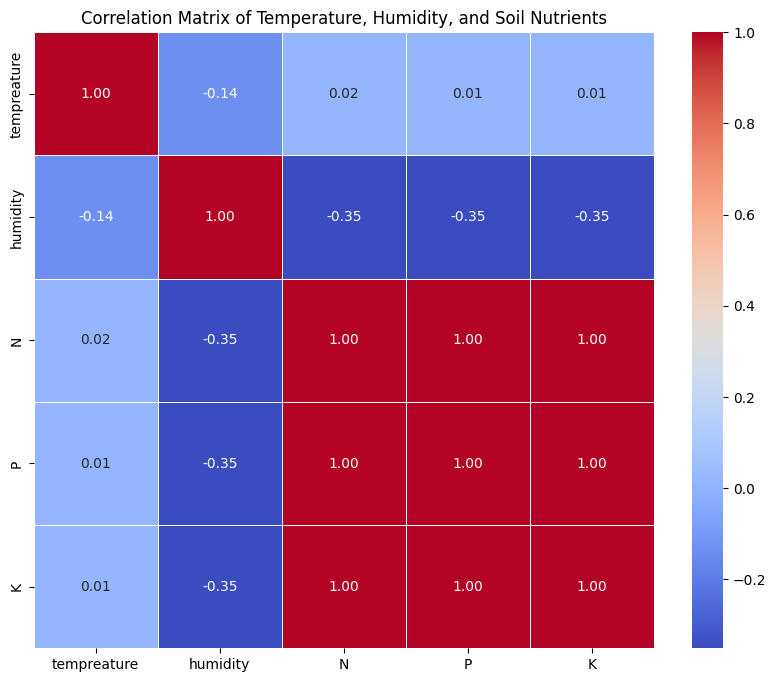

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

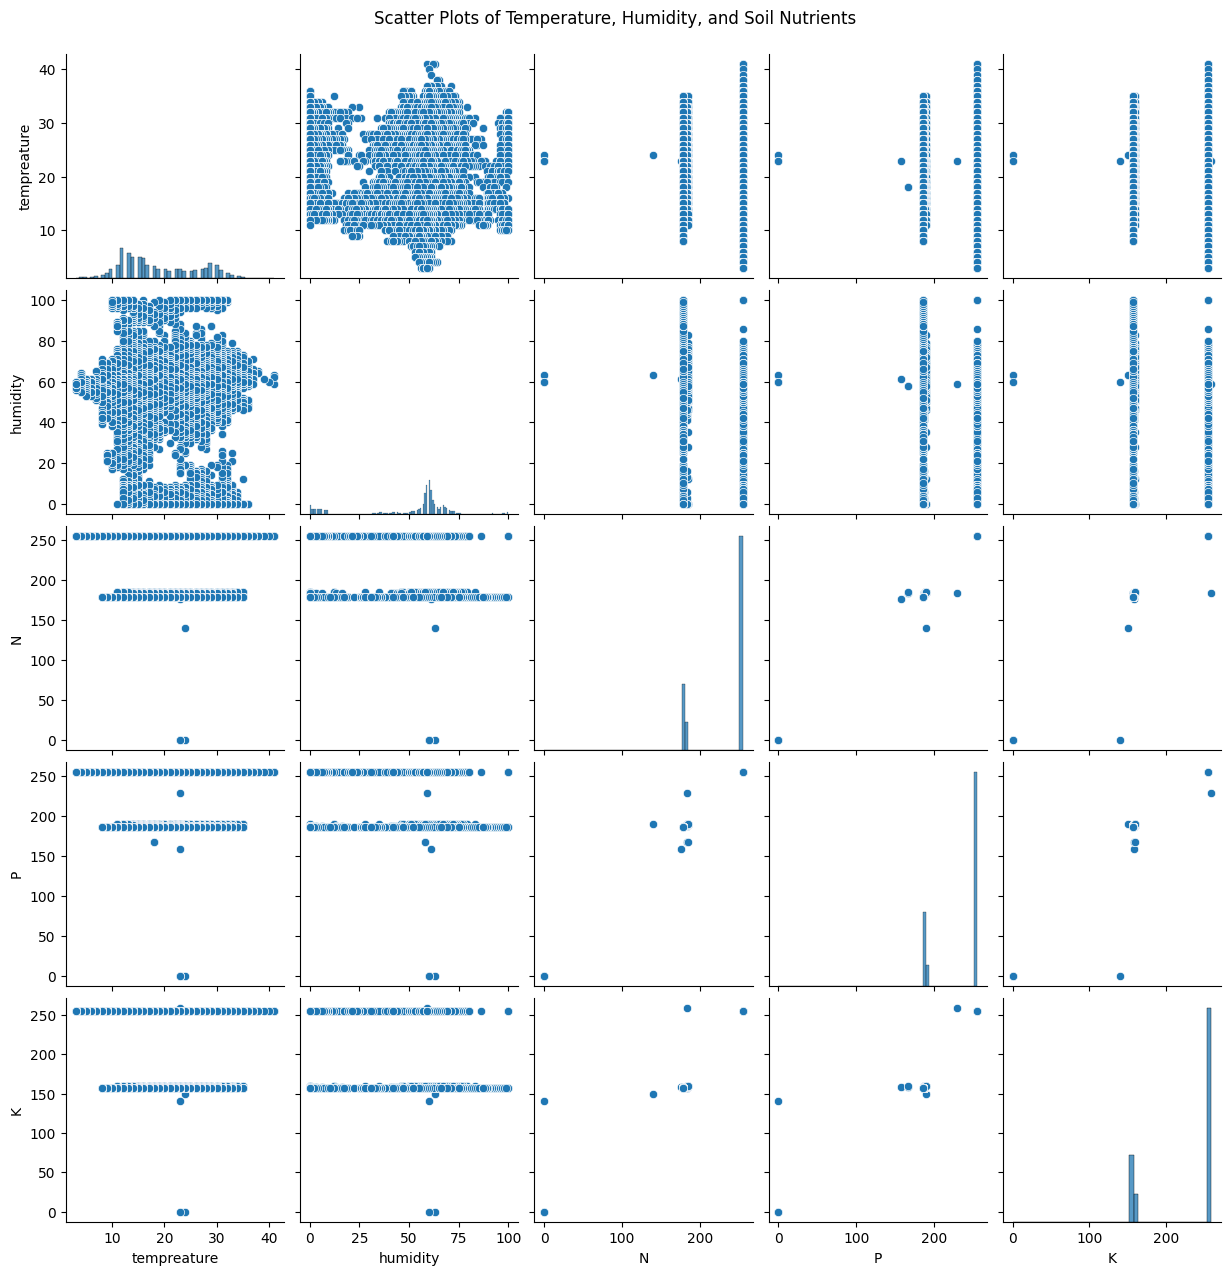

In [3]:
import seaborn as sns

# Selecting only the relevant columns for correlation analysis
relevant_columns = data[['tempreature', 'humidity', 'N', 'P', 'K']]
correlation_matrix = relevant_columns.corr()

# Displaying the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Temperature, Humidity, and Soil Nutrients')
plt.show()

# Scatter plots to visualize relationships
sns.pairplot(relevant_columns)
plt.suptitle('Scatter Plots of Temperature, Humidity, and Soil Nutrients', y=1.02)
plt.show()


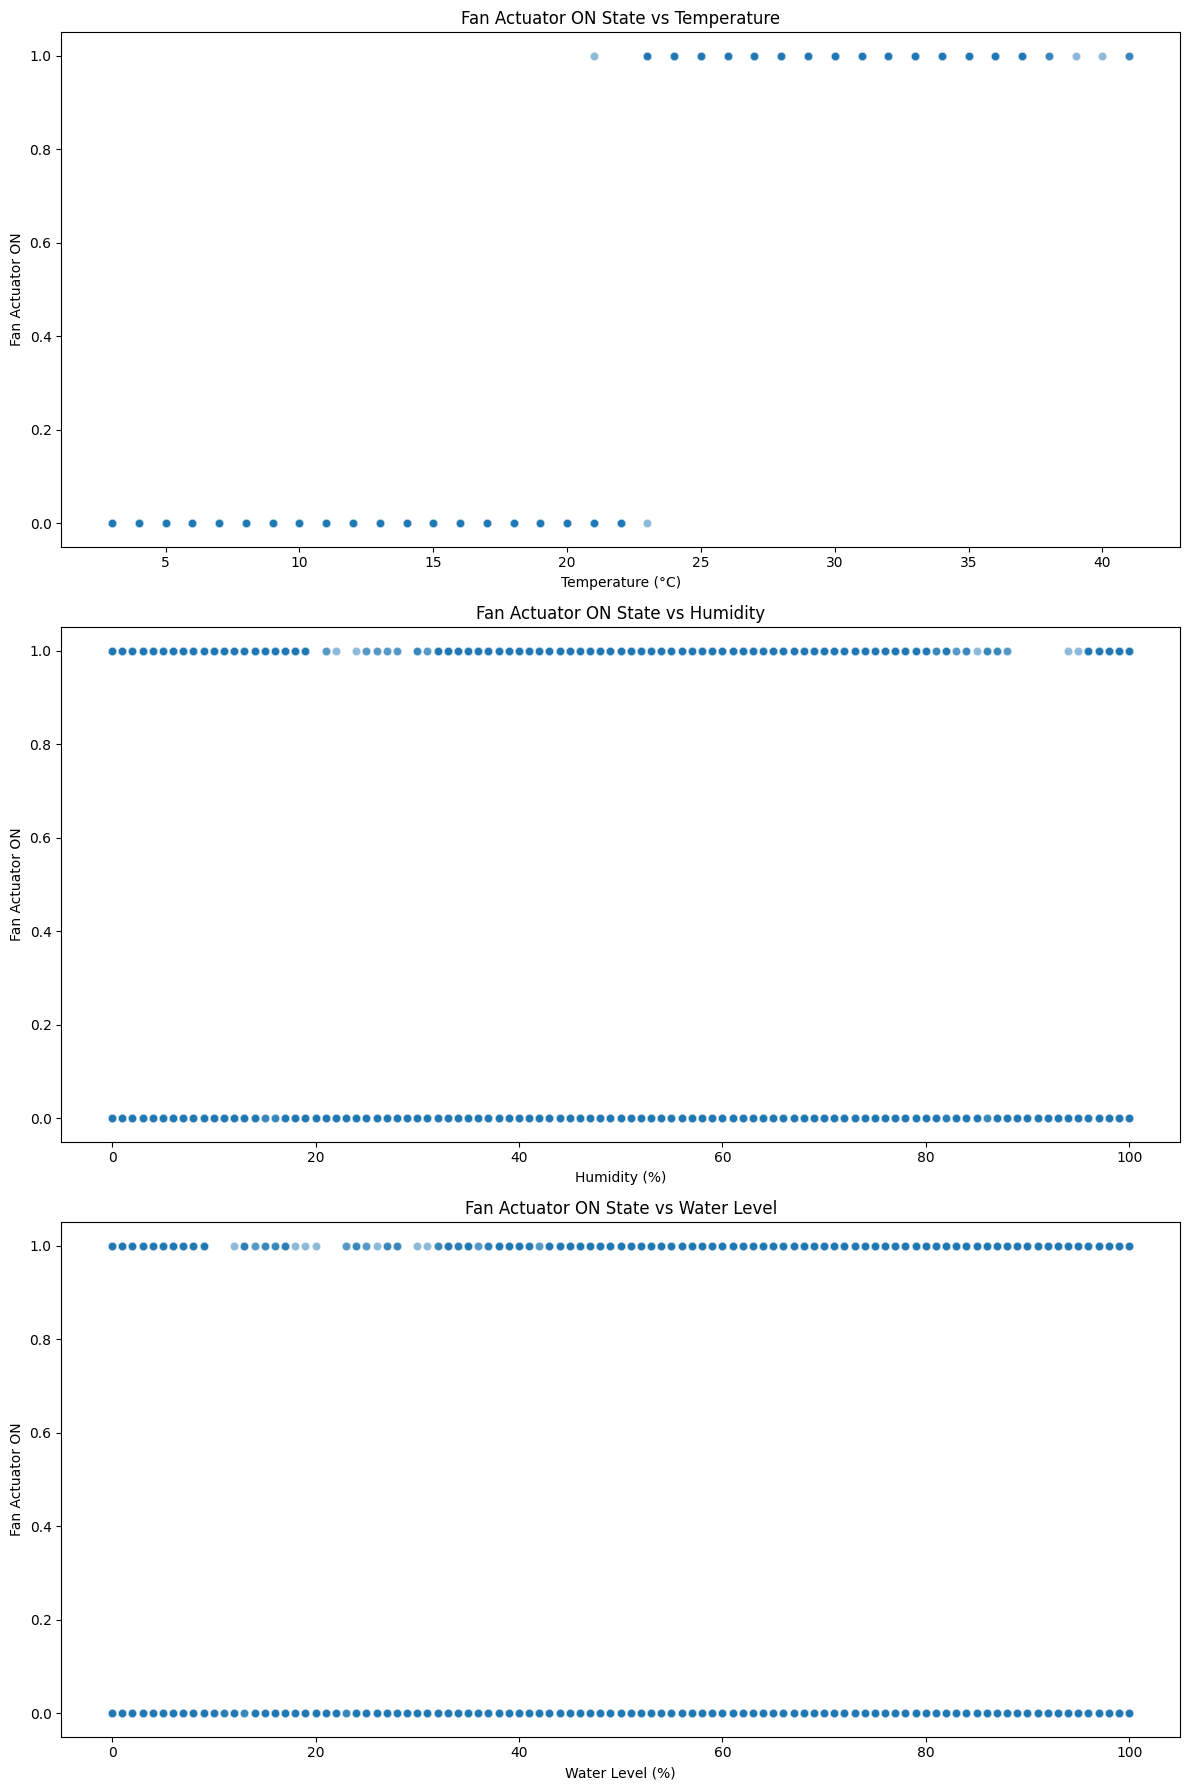

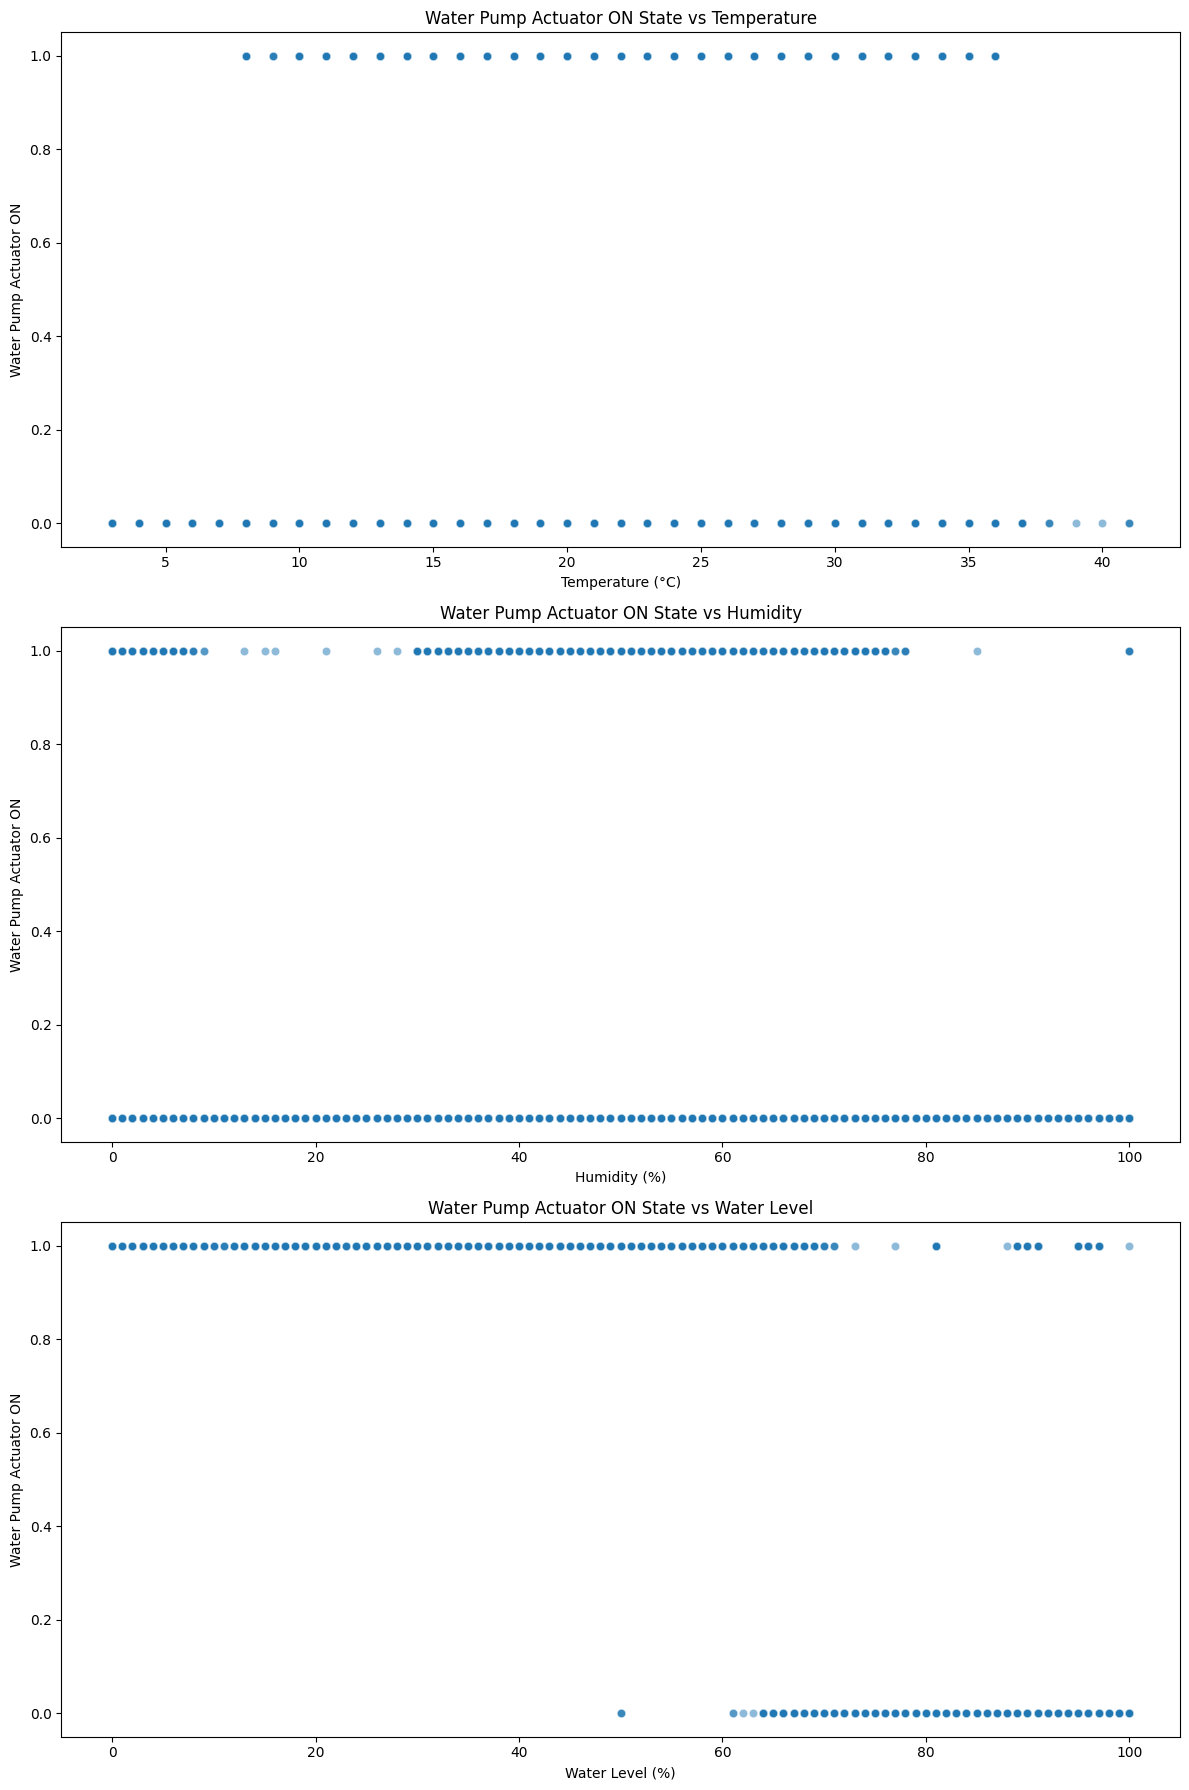

In [4]:
# Analyze how the states of fan and water pump actuators respond to changes in temperature, humidity, and water level.
# We will use scatter plots with hue based on actuator states to visualize these relationships.

# Fan Actuator Analysis
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

sns.scatterplot(data=data, x='tempreature', y='Fan_actuator_ON', ax=axs[0], alpha=0.5)
axs[0].set_title('Fan Actuator ON State vs Temperature')
axs[0].set_ylabel('Fan Actuator ON')
axs[0].set_xlabel('Temperature (°C)')

sns.scatterplot(data=data, x='humidity', y='Fan_actuator_ON', ax=axs[1], alpha=0.5)
axs[1].set_title('Fan Actuator ON State vs Humidity')
axs[1].set_ylabel('Fan Actuator ON')
axs[1].set_xlabel('Humidity (%)')

sns.scatterplot(data=data, x='water_level', y='Fan_actuator_ON', ax=axs[2], alpha=0.5)
axs[2].set_title('Fan Actuator ON State vs Water Level')
axs[2].set_ylabel('Fan Actuator ON')
axs[2].set_xlabel('Water Level (%)')

plt.tight_layout()
plt.show()

# Water Pump Actuator Analysis
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

sns.scatterplot(data=data, x='tempreature', y='Water_pump_actuator_ON', ax=axs[0], alpha=0.5)
axs[0].set_title('Water Pump Actuator ON State vs Temperature')
axs[0].set_ylabel('Water Pump Actuator ON')
axs[0].set_xlabel('Temperature (°C)')

sns.scatterplot(data=data, x='humidity', y='Water_pump_actuator_ON', ax=axs[1], alpha=0.5)
axs[1].set_title('Water Pump Actuator ON State vs Humidity')
axs[1].set_ylabel('Water Pump Actuator ON')
axs[1].set_xlabel('Humidity (%)')

sns.scatterplot(data=data, x='water_level', y='Water_pump_actuator_ON', ax=axs[2], alpha=0.5)
axs[2].set_title('Water Pump Actuator ON State vs Water Level')
axs[2].set_ylabel('Water Pump Actuator ON')
axs[2].set_xlabel('Water Level (%)')

plt.tight_layout()
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Selecting features and target for the model
features = data[['humidity', 'water_level', 'N', 'P', 'K', 'Fan_actuator_OFF', 'Fan_actuator_ON', 'Watering_plant_pump_OFF', 'Watering_plant_pump_ON', 'Water_pump_actuator_OFF', 'Water_pump_actuator_ON']]
targets = data['tempreature']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Creating and training the XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Feature importance
importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(importance_df)


Mean Squared Error: 8.99019660919774
R^2 Score: 0.8232413563859597
Feature Importances:
                    Feature  Importance
5          Fan_actuator_OFF    0.976999
1               water_level    0.007054
3                         P    0.004718
0                  humidity    0.003990
2                         N    0.003660
9   Water_pump_actuator_OFF    0.002398
4                         K    0.000746
7   Watering_plant_pump_OFF    0.000434
6           Fan_actuator_ON    0.000000
8    Watering_plant_pump_ON    0.000000
10   Water_pump_actuator_ON    0.000000


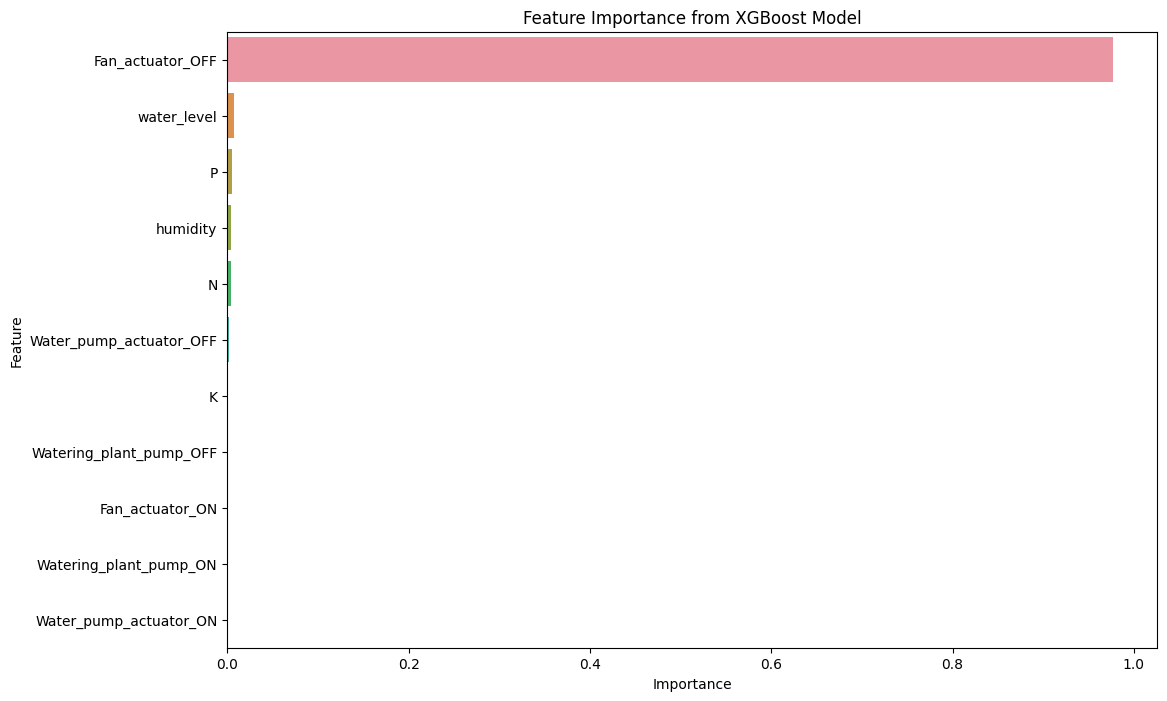

In [6]:
# Analyzing feature importance from the predictive models
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
